# Práctica 4

In [77]:
clear all
addpath('./Biblioteca')
graphics_toolkit ("gnuplot"); %% Comando solo para jupyter notebooks

Para realizar esta práctica necesitas descargar algunos script de Octave que he subido al Aula Virtual. Si no lo has hecho ya, descarga el archivo Practica4Anadir_Biblioteca.zip, situado en la carpeta CodigoPracticas de los Recursos del AV. Descomprímelo y guarda su contenido en la carpeta Biblioteca que debe estar contenida en tu carpeta de trabajo con Octave de tu ordenador personal.

El objetivo de esta práctica es experimentar con la interpolación por splines. El tercer ejercicio vuelve sobre los polinomios interpoladores en la forma de Lagrange. Este tercer ejercicio, que iniciaremos si es posible en la sesión de prácticas, formará parte de la primera enterega de prácticas.

Para comprender bien las funciones de cálculo de los splines, en particular sus variables de entrada y salida, debes tener en cuenta que para estas funciones construidas en Octave, un spline se identifica con los nodos en los que interpola $(x_0, . . . , x_n)$ y los coeficientes de los distintos polinomios cúbicos que
lo componen:

$$p_i(x) = a_i + b_i(x-x_i) + c_i(x-x_i)^2 + d_i(x-x_i)^3, \quad i=0,..., n-1$$

donde $p_i(x)$ es la pieza polinomial que forma el spline definido $[x_i, x_{i+1}]$. Si el spline es sujeto necesitas
proporcionar además los valores de la derivada en los puntos extremos $x_0$ y $x_n$. Ten en cuenta, finalmente,
que para evaluar un spline en una abscisa se deben conocer los nodos, pues la evaluación necesita conocer
en qué intervalo $[x_i, x_{i+1}]$ se encuentra dicha abscisa.

- **splineNatural.m** devuelve los coeficientes $b_i, c_i, d_i$ (en la forma $[b,c,d]$) de los polinomios cúbicos
que componen el spline natural. Los argumentos que espera son: el vector de nodos(x) y el vector de ordenadas (a).

- **splineSujeto.m** devuelve los coeficientes $b_i, c_i, d_i$ (en la forma $[b,c,d]$) de los polinomios cúbicos
que componen el spline sujeto. Se le suministra como variables, naturalmente, además de las coordenadas de los puntos que se interpolan (x y a), la derivada en los puntos inicial y final (*tan_ini* y *tan_fin*).

- **splineEval.m** devuelve la evaluación de un spline en una abscisa (que puede ser un vector de abscisas). necesita como argumentos: los nodos (x) y ordenadas (a), así como los vectores de coeficientes (b, c, d) y el vector de abscisas donde se evalúa(t).

- **splineTabla.m** es una función auxiliar, en general innecesaria, que únicamente produce una salida impresa de los polinomios que componen el spline: necesita por tanto todos los datos que lo definen (x, a, b, c y d).

Antes de utilizar cualquiera de estas funciones, asegúrate de entender qué argumentos espera, su tipo y significado, así como qué salidas produce, su significado, orden y formato. Importante: ¡los nodos deben pasarse ordenados!

## Ejemplos sencillos

### Aparatado *a*:

Considera la lista de puntos ${(0, 1), (3, 0), (2, 2), (1, 4)}$. Representa en un panel de dibujo el spline cúbico natural que interpola los puntos de la lista. ¿Serías capaz de dibujar de distinto color cada una de las tres piezas que componen el spline?

#### Solución:

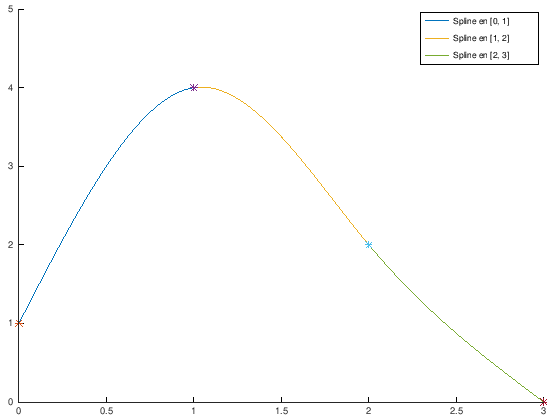

In [78]:
clear all

%% Ordenamos los pares de abcisas y ordenadas directamente:
x = [ 0, 1, 2, 3];
a = [ 1, 4, 2, 0];

[b, c, d] = splineNatural(x, a);

figure(1)
for i=1:length(x)-1
    hold on
    interval = linspace(x(i), x(i+1), 500);
    plot(interval, splineEval(x,a,b,c,d,interval), sprintf(';Spline en [%u, %u] ;', x(i), x(i+1)), x(i), a(i),'*')
endfor

plot(x(length(x)), a(length(x)), '*')


### Apartado b

Representa en otra ventana gráfica los splines cúbicos sujetos $S(x)$ que interpolan los mismos puntos y que tienen derivadas en los extremos $S'(0) = a$, $S'(3) = b$, para distintos valores de
(a, b) = (0, −1), (1, 5), (−2, −5) y (−5, −1).

#### Solución

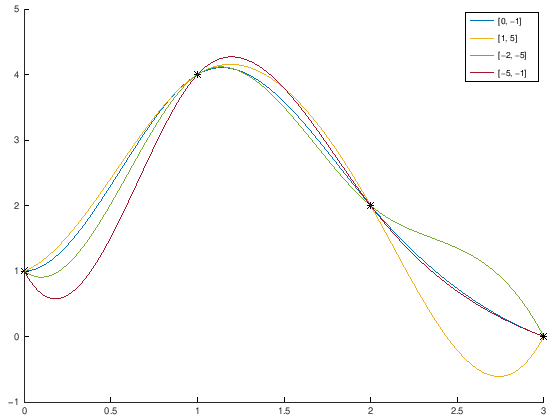

In [79]:
clear all

%% Ordenamos los pares de abcisas y ordenadas directamente:
x = [ 0, 1, 2, 3];
a = [ 1, 4, 2, 0];

interval = linspace( 0, 3, 500);

tan_ini = [0, 1, -2, -5];
tan_fin = [-1, 5, -5, -1];

figure(1)
for i=1:length(x)

    hold on
    [b, c, d] = splineSujeto( x, a, tan_ini(i), tan_fin(i));

    eval = splineEval(x, a, b, c, d, interval);
    
    plot(interval, eval, sprintf(';[%u, %u];', tan_ini(i), tan_fin(i)), x(i), a(i),'*', 'color', 'k')


endfor

### Apartado C

Considera los puntos $\{(0, 0), (1, 2), (2, 4), (5, 10)\}$. ¿Qué función spline natural debes encontrar que interpole dichos puntos? Responde a la cuestión antes de verificarlo con un pequeño programa... Es una forma de verificar que el programa de cálculo de splines funciona correctamente.

#### Solución

Sabemos que los polinomios cúbicos que componen el spline, centrados en el extremo izquierdo de los intervalos, deben ser de la forma:

$$p_i(x) = a_i + b_i(x-x_i) + c_i(x-x_i)^2 + d_i(x-x_i)^3, \quad i=0,..., n-1$$

Pero si nos fijamos, en este caso, las ordenadas vienen dadas por la función $f(x) = 2x$, y por lo tanto podemos asegurar la unicidad del spline natural que interpole a $f(x)$ en dichos nodos. Pero, no es difícil observar que $f(x)$ es un polinomio de grado 1, por tanto, para cualquiera de los subintervalos $[x_{i}, x_{i+1}]$ con $i=0,..., n-1$ podemos definir $p_i(x) = f(x)$, por lo que de forma directa se verifican todas las condiciones de un spline ya que $f''(x) = 0$ para todo $x\in \mathbb{R}$ y su derivada es constante y por lo tanto continua.

En resumen, si calculamos ahora los coeficientes de $p_i(x)$ para cada $i=0,..., n-1$; como deben ser de la forma $p_i(x) = a_i + b_i(x-x_i) + c_i(x-x_i)^2 + d_i(x-x_i)^3$, y a la vez verificar que $p_i(x) = f(x)$, entonces se tiene que $p_i(x) = a_i + 2(x-x_i)$, y por tanto se tendrá que $b_i = 2;\  c_i = d_i = 0$ para todo $i=0,...,n-1$.

Esto último viene de que $2x = 2(x_i + (x-x_i)) = 2x_i + 2(x-x_i) = a_i * 2(x-x_i)$ con $x \geq x_i$, qué es la forma del polinomio de grado $\leq 3$ que buscabamos.

  Intervalo                    Spline 
-------------------------------------------------------------------------------------------------
[+0.00e+00 +1.00e+00]	 0+2*(x-0)+0*(x-0)^2+0*(x-0)^3
 [+1.00e+00 +2.00e+00]	 2+2*(x-1)+0*(x-1)^2+0*(x-1)^3
 [+2.00e+00 +5.00e+00]	 4+2*(x-2)+0*(x-2)^2+0*(x-2)^3
 -------------------------------------------------------------------------------------------------


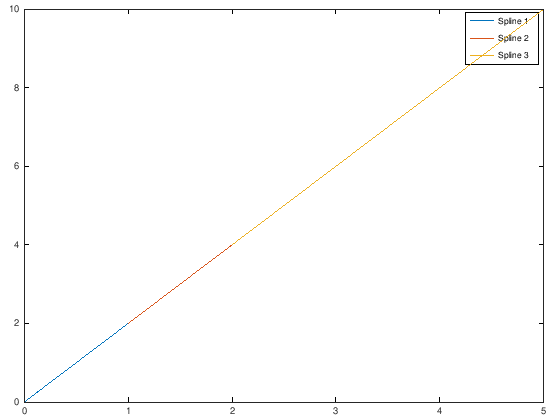

In [80]:
clear all

x = [0, 1, 2, 5];
a = x.*2; % Si nos fijamos, podemos ver que las ordenadas son las abcisas multiplicadas por dos.

[b, c, d] = splineNatural(x, a);

splineTabla(x, a, b, c, d);

for i=1:length(x)-1
    interval = linspace(x(i), x(i+1), 500);
    plot(interval, splineEval(x, a, b, c, d, interval), sprintf(';Spline %u;', i))
    hold on
endfor


### Apartado D

Responde a la misma pregunta anterior para un spline sujeto que interpola los puntos (0, 0), (1, 1), (2, 8), (3, 27) y tiene derivada 0 en x = 0 y 27 en x = 3.

## Solución

De igual manera que antes, este conjunto de nodos interpolan a la función $f(x) = x^3$. Como $f(x)$ es derivable en 0 y 3 y sus derivadas son de hecho 0 y 27 respectivamente, podemos asegurar la unicidad del polinomio interpolador sujeto. Ahora, si restringimos $f(x)$ a cada subintervalo $[x_i, x_{i+1}]$ estamos definiendo en polinomio de grado 3 en cada uno de los subintervalos que además cumple todas las condiciones necesarias para ser un spline sujeto. Por tanto, por el teorema de unicidad del spline sujeto, este es el único que cumple todas las condiciones. 

  Intervalo                    Spline 
-------------------------------------------------------------------------------------------------
[+0.00e+00 +1.00e+00]	 0+0*(x-0)+0*(x-0)^2+1*(x-0)^3
 [+1.00e+00 +2.00e+00]	 1+3*(x-1)+3*(x-1)^2+1*(x-1)^3
 [+2.00e+00 +3.00e+00]	 8+12*(x-2)+6*(x-2)^2+1*(x-2)^3
 -------------------------------------------------------------------------------------------------


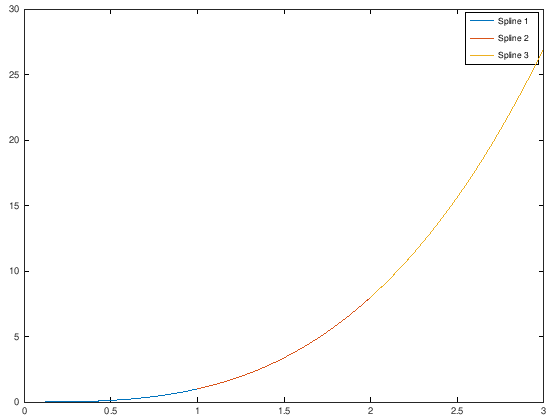

In [81]:
clear all

x = [0, 1, 2, 3];
a = x.^3;

tan_ini = 0;
tan_fin = 27;

[b, c, d] = splineSujeto(x, a, tan_ini, tan_fin);

splineTabla(x, a, b, c, d);

for i=1:length(x)-1
    interval = linspace(x(i), x(i+1), 500);
    plot(interval, splineEval(x, a, b, c, d, interval), sprintf(';Spline %u;', i))
    hold on
endfor

## Ejercicio 2: 

Curvas sueves en el plano obtenidas mediante el cálculo de splines: aproximar una espiral de Arquímedes mediantes splines cúbicos.

### Apartado a)

Consideramos una partición $\{θ_i\} _{i=0}^9$ de 10 puntos equidistribuidos en el intervalo $[0,4\pi]$. Calculamos los 10 puntos correspondientes en la espiral arquimediana, que tiene por ecuación en coordenadas polares $ρ = 2\theta$, con $θ ∈[0,4\pi]$. Así, las ecuaciones cartesianas de la espiral son:

$$x(0) = 2\theta \cos\theta, \quad y(\theta) = 2\theta \sin \theta .$$

#### Solución:

Esta es la representación directa de la función sin hacer uso de los splines, que como es una función sencilla y de calculo rápido, podemos representar gráficamente y así poder comparar posteriormente con las aproximaciones por splines.

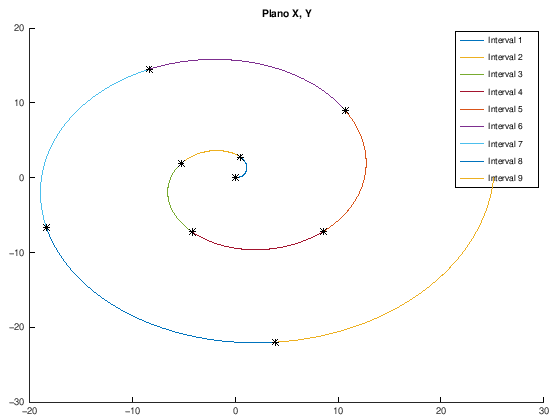

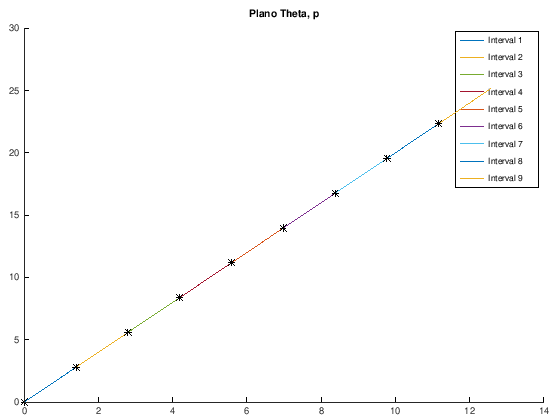

In [82]:
clear all

theta = linspace(0, 4*pi, 10);
p = 2 .* theta;

polares_x = @(theta) 2 .* theta .* cos(theta);
polares_y = @(theta) 2 .* theta .* sin(theta);

imag_theta = @(theta) 2.* theta;

x = polares_x(theta);
y = polares_y(theta);

figure(1)
hold on
title("Plano X, Y")
for i=1:length(theta)-1

    interval = linspace(theta(i), theta(i+1), 500);
    
    hold on
    plot(polares_x(interval), polares_y(interval), sprintf(';Interval %u;', i), x(i), y(i),'*', 'color', 'k')

endfor

figure(2)
hold on
title("Plano Theta, p")
for i=1:length(theta)-1

    interval = linspace(theta(i), theta(i+1), 500);
    
    hold on
    plot(interval, imag_theta(interval), sprintf(';Interval %u;', i), theta(i), 2 * theta(i),'*', 'color', 'k')

endfor

### Apartado b)

Con las listas de puntos $\{(\theta _i, x(\theta _i ))\}$ y $\{(\theta _i, y(\theta _i ))\}$ calculamos sendos splines cúbicos naturales, que llamaremos $x(\theta)$, $y(\theta)$ .

#### Solución:

Recordemos, en el apartado anterior ya hemos definido los $\theta _i$, $x(\theta _i )$ e $y(\theta _i )$, así que solo queda calcular los splines cúbicos.

In [83]:
[b_x, c_x, d_x] = splineNatural(theta, x);

[b_y, c_y, d_y] = splineNatural(theta, y);

### Apartado c)

Ahora representaremos en un panel gráfico la propia espiral arquimediana anterior y su aproximación por splines $(x(\theta), y(\theta))$.

#### Solución:

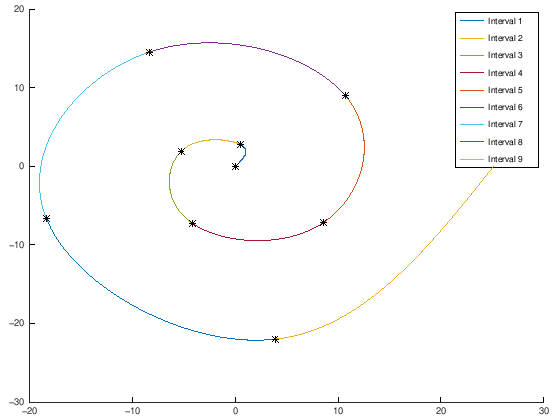

In [84]:
for i=1:length(theta)-1

    interval = linspace(theta(i), theta(i+1), 500);

    eval_x = splineEval(theta, x, b_x, c_x, d_x, interval);

    eval_y = splineEval(theta, y, b_y, c_y, d_y, interval);
    
    hold on
    plot(eval_x, eval_y, sprintf(';Interval %u;', i), x(i), y(i),'*', 'color', 'k')

endfor

### Aparatado c)
Realiza ahora la misma tarea con splines sujetos, añadiendo derivadas en los extremos:

$$ x'(0) = 2, \quad x'(4 \pi) = 2, \quad\quad y'(0) = 0, \quad y'(4 \pi) = 8\pi. $$

#### Solución:

Ralizamos los mismos pasos que con el spline Natural, pero añadiendo las derivadas. Veremos que con los splines Sujetos aproximamos mucho mejor.

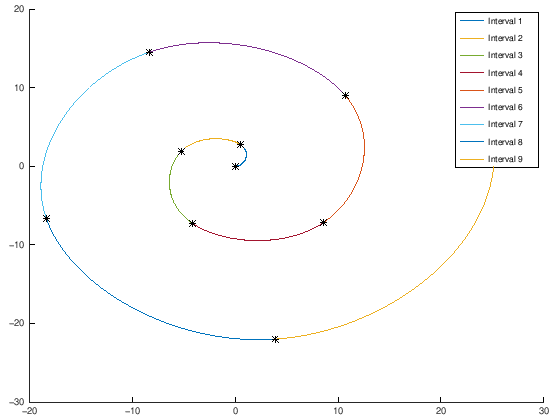

In [85]:
tan_ini_x = 2;
tan_fin_x = 2;

tan_ini_y = 0;
tan_fin_y = 8 * pi;

[b_x, c_x, d_x] = splineSujeto(theta, x, tan_ini_x, tan_fin_x);
[b_y, c_y, d_y] = splineSujeto(theta, y, tan_ini_y, tan_fin_y);

for i=1:length(theta)-1

    interval = linspace(theta(i), theta(i+1), 500);

    eval_x = splineEval(theta, x, b_x, c_x, d_x, interval);

    eval_y = splineEval(theta, y, b_y, c_y, d_y, interval);
    
    hold on
    plot(eval_x, eval_y, sprintf(';Interval %u;', i), x(i), y(i),'*', 'color', 'k')

endfor

## Ejercicio 3 (Ejercicio que formará parte de la entrega de prácticas):

A estas alturas tenemos a nuestra disposición (en teoría) varias formas de calcular y evaluar un polinomio interpolador. Esta formas son (en términos generales):

* Calcular los coeficientes del polinomio en su forma de Newton y evaluarlo mediante el método de Horner.
* Calcular los coeficientes de la forma de Lagrange (que es un polinomio escrito en la forma habitual $a_nx_n + · · · + a_1x + a_0$) y evaluarlo mediante el método de Horner.
* Evaluar directamente el polinomio mediante la fórma de Lagrange.

La primera de las formas anteriores ya es conocida y la tenemos programad; ha sido la forma habitual de cálculo, hasta ahora. El objetivo de este ejercicio es implementar en Octave el segundo procedimiento.

### Aparatado a)

Escribe una función denominada **factLagrange.m**, que guardaras en */Biblioteca*, que realice la tarea siguiente: a partir de su único argumento **x**, que es el vector de nodos de interpolación $(x = \{x_0, . . . , x_n\})$, devuelve una matriz cuya fila k-ésima contiene los coeficientes del factor de Lagrange (k = 0, . . . , n): 

$$L_k(x) = \prod ^{n}_{j = 0 j\neq k}\frac{x-x_j}{x_k -x_j}$$

Para facilitar la tarea usaremos la función de Octave **conv(p,q)** que devuelve el polinomio producto de los polinomios _*p*_ y _*q* _(¡recuerda cómo se representan los polinomios en Octave!).

#### Solución:

Recordamos que los polinomios se representan en octave a través de sus coeficientes ordenados de mayor a menor grado.


In [86]:
%% /Biblioteca/factLagrange.m

function ret = factLagrange(x)

    matriz = zeros(length(x), length(x));

    for i=1:length(x)
        p=1;
        for j=1:length(x)
            if j~=i
                c = poly(x(j))/(x(i)-x(j)); % Poly devuleve los coeficientes del polinomio cuyas raíces son el argumento dado, es decir, 
                                            % en este caso poly(x(j)) = 1*x -x(j)*x^0 = [1, -x(j)] en notación de octave.
                p = conv(p,c);
            end
        end
        matriz(i, :) = p;
    endfor
    ret = matriz;
endfunction

In [87]:
% Otra firma de escribir la función anterior.

function ret = PruebaLG (x)
    matriz = zeros(length(x), length(x));

    for i=1:length(x)
        p=1;
        c = poly(x( (1:length(x)) ~= i ));
        matriz(i, :) = c / polyval(c, x(i));
    endfor
    ret = matriz;
endfunction

### Apartado b)

Crea en */Biblioteca* la función **interpolLagrange.m** que espera como argumentos la matriz de coeficientes de los factores de Lagrange y el vector de ordenadas a interpolar, y devuelve los coeficientes del polinomio interpolador en la forma de Lagrange:

$$p(x) = \sum ^{n}_{k=0} y_k L_k(x)$$

#### Solución:

In [88]:
%% /Biblioteca/interpolLagrange.m

function ret = interpolLagrange (matriz, y)

    suma = 0;
    for i=1:length(y)
        term = y(i) * matriz(i, :);
        suma = suma + term;
    endfor

    ret = suma;

endfunction

### Apartado c)

Para verificar que la implementación es correcta: escribe en el script **Ejercicio3_1.m** el cálculo de los coeficientes del polinomio interpolador en los conjuntos de puntos

$$\{(0, 0), (1, 2), (2, 4), (5, 10)\}\quad y \quad\{(0, 0), (1, 1), (2, 8), (3, 27)\}.$$

¿Coinciden exactamente los polinomios que produce el script con los esperados? Si no es así, ¿hay alguna explicación o hay errores en el script?

#### Solución:

El segudo ejemplo si da el polinomio exacto, pero en el primero se añade un coeficiente muy pequeño multiplicando a $x^3$. Este error será provocado por los errores de cálculo de la máquina.

2.7756e-17*x^3 + 0*x^2 + 2*x^1 + 0
1*x^3 + 0*x^2 + 0*x^1 + 0


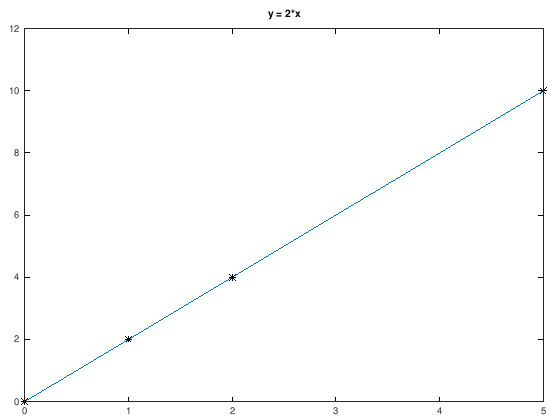

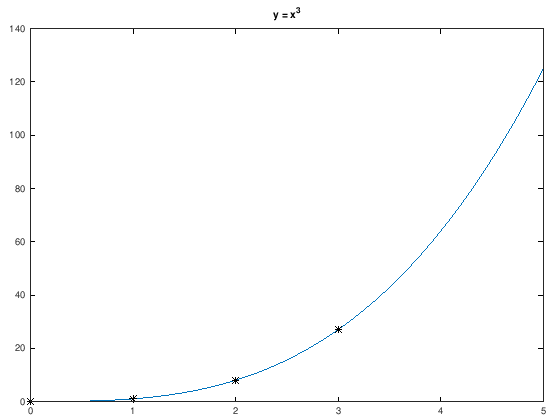

In [89]:
%% Ejercicio3_1.m

clear all

function ret = Lagrange(x, y)
    matriz = factLagrange(x);
    polinomio = interpolLagrange(matriz, y);
    ret = polinomio;
endfunction

x_1 = [0, 1, 2, 5];
y_1 = x_1 .* 2;

x_2 = [0, 1, 2, 3];
y_2 = x_2 .^ 3;

pol_1 = Lagrange(x_1, y_1);
pol_2 = Lagrange(x_2, y_2);

intervalo = linspace(0, 5, 500);

polyout(pol_1, 'x')
figure(1)
plot(intervalo, polyval(pol_1, intervalo), x_1, y_1, '*', 'color', 'k')
title("y = 2*x")

polyout(pol_2, 'x')
figure(2)
plot(intervalo, polyval(pol_2, intervalo), x_2, y_2, '*', 'color', 'k')
title("y = x^3")

### Apartado c)

Una vez creadas las funciones anteriores disponemos ya del polinomio interpolador en la forma de Lagrange: para evaluarlo en un vector de abscisas, z, utilizaremos la siguiente función de Octave **polyval(p,z)** que devuelve el vector de las evaluaciones del polinomio p en z: este cálculo está implementado
en Octave mediante el método de Horner (así que no vale la pena que lo implementemos nosotros...)

Para comparar los resultados de ambas formas de cálculo utilizaremos la interpolación de la función _sen(x)_ en el intervalo [0, 2π], mediante nodos equidistribuidos: $x_0 = a$, $x_k = a + k\frac{2π}{n}$.

Para esta función sabemos que los polinomios interpoladores $p_n(x)$ convergen uniformemente a *f(x)*, por lo que si aumentamos considerablemente el número de puntos a interpolar deberíamos aproximar más y más a la función...

#### Solución:

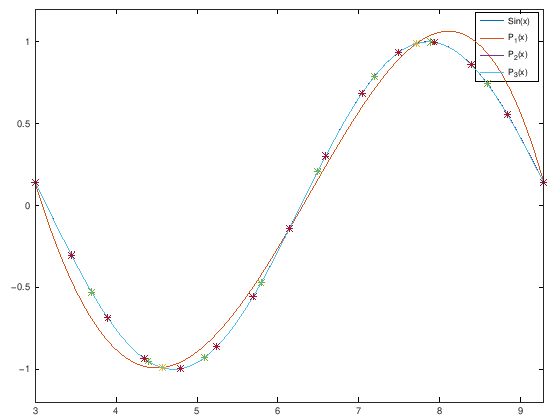

In [90]:
clear all

function ret = Lagrange(x, y)
    matriz = factLagrange(x);
    polinomio = interpolLagrange(matriz, y);
    ret = polinomio;
endfunction

a = 3;
n = [5, 10, 15];
interval = linspace(0, 2*pi, 500);
interval = interval + a;

figure(1)
plot(interval, sin(interval), ";Sin(x);")
hold on

for i=1:length(n)

    x = linspace(a, 2*pi + a, n(i));
    y = sin(x);

    plot(interval, polyval(Lagrange(x, y), interval), sprintf(';P_%u(x);', i), x, y, '*')

endfor


ylim([-1.2, 1.2]);
xlim([0 + a, 2*pi + a]);

### Apartado e)

Crea el script **Ejercicio3_2.m** que para un valor de n realice las tareas siguientes:

* en una primera ventana gráfica incluya las gráficas de *f* y del polinomio interpolador en la forma de Newton;

* en una segunda ventana gráfica incluya las gráficas de *f* y del polinomio interpolador en la forma de Lagrange;

* en otra ventana incluya la gráfica del valor absoluto de la diferencia de los dos polinomios interpoladores;

* nos dé como salida en la ventana de comandos el máximo del valor absoluto de la diferencia anterior (calculado sobre una malla de puntos en el intervalo $[0, 2\pi]$).

Ejecuta el script anterior para distintos valores de n, por ejemplo: 5, 10, 15 y otros mayores, por ejemplo 20, 30, 40. ¿Qué observas? Observa que las diferencias grandes aparecen cerca de los extremos del intervalo, ¿tiene esto que ver con el fenómeno de Runge? Comenta lo que consideres adecuado sobre la estabilidad de los cálculos en una u otra forma.

#### Solución:

error_Newton_max = 7.2219e-05
error_Lagrange_max = 7.2219e-05


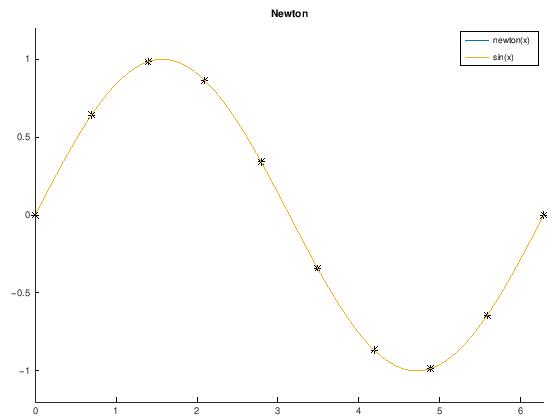

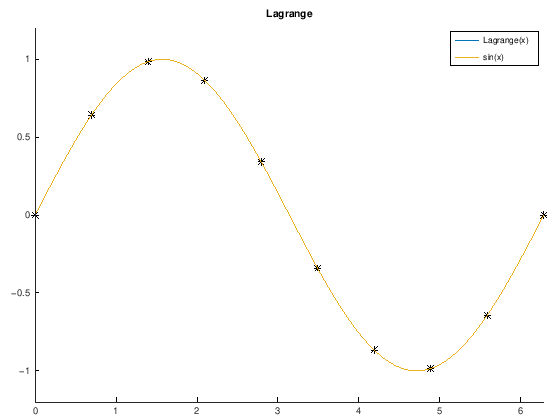

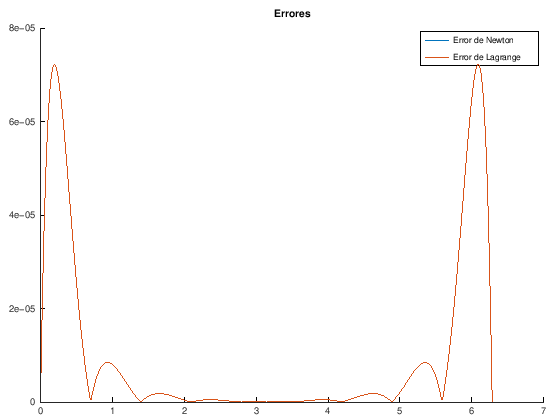

In [91]:
% Ejercicio3_2.m

clear all

function ret = Lagrange(x, y)
    matriz = factLagrange(x);
    polinomio = interpolLagrange(matriz, y);
    ret = polinomio;
endfunction

n = 10;
a = 0;

x = linspace(0 + a, 2*pi + a, n);
y = sin(x);

interval = linspace(0 + a, 2*pi + a, 500);

figure(1)
title("Newton")
hold on
coef = interpolNewton(x, y);
evalNetown = polyinterpolador_eval(coef, x, interval);
plot(interval, evalNetown, ";newton(x);", x, y, '*', 'color', 'k')
plot(interval, sin(interval), ";sin(x);")
ylim([-1.2, 1.2]);
xlim([0 + a, 2*pi + a]);
hold off

figure(2)
title("Lagrange")
hold on
evalLagrange = polyval(Lagrange(x, y), interval);
plot(interval, evalLagrange, ";Lagrange(x);", x, y, '*', 'color', 'k')
plot(interval, sin(interval), ";sin(x);")
ylim([-1.2, 1.2]);
xlim([0 + a, 2*pi + a]);
hold off

figure(3)
title("Errores")
hold on
error_newton = abs(evalNetown - sin(interval));
plot(interval, error_newton, ";Error de Newton;")
error_Newton_max = max(error_newton)

errorLagrange = abs(evalLagrange - sin(interval));
plot(interval, errorLagrange, ";Error de Lagrange;")
error_Lagrange_max = max(errorLagrange)